# Problem Set 2 - James He

# AML

## Exercise 3.1

Will PLA ever stop updating if the data is not lineraly seperable?

### Solution::::

No, PLA will not stop updating if the data is not lineraly seperable. This is because PLA will keep updating the weights until all the data points are correctly classified. If the data is not lineraly seperable, then there will always be a data point that is misclassified, and PLA will keep updating the weights.

## Exercise 3.7

For logistic regression, show that 

\begin{split}
\triangledown E_{in}(w) &= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^Tx_n}}\\
&= -\frac{1}{N}\sum_{n=1}^{N}-y_nx_n\sigma(-y_nw^Tx_n)\\
\end{split}

Argue that a 'misclassified' example contributes more to the gradient than a correctly classified one.

### Solution:

\begin{split}
\triangledown E_{in}(w) &= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^Tx_n}}\\
&= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^Tx_n}}\frac{e^{y_nw^Tx_n}}{e^{y_nw^Tx_n}}\\
&= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{e^{y_nw^Tx_n}+e^{y_nw^Tx_n}}\\
&= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{e^{y_nw^Tx_n}+1+e^{y_nw^Tx_n}-1}\\
&= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{e^{y_nw^Tx_n}+1}-\frac{y_nx_n}{1+e^{y_nw^Tx_n}}\\
&= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^Tx_n}}+\frac{y_nx_n}{1+e^{y_nw^Tx_n}}-\frac{y_nx_n}{1+e^{y_nw^Tx_n}}\\
&= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^Tx_n}}+\frac{y_nx_n}{1+e^{y_nw^Tx_n}}-\frac{y_nx_n}{1+e^{y_nw^Tx_n}}\\
&= -\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^Tx_n}}\\
\end{split}

A 'misclassified' example contributes more to the gradient than a correctly classified one because the gradient is proportional to the error. The error is the difference between the predicted value and the actual value. If the example is misclassified, then the error is large, and the gradient is large. If the example is correctly classified, then the error is small, and the gradient is small.

## Exercise 3.8

The claim that $\hat{v}$ is the direction which gives largest decrease in $E_{in}$ only holds for small $\eta$. Why?

### Solution:

The claim that $\hat{v}$ is the direction which gives largest decrease in $E_{in}$ only holds for small $\eta$ because the gradient is proportional to the error. The error is the difference between the predicted value and the actual value. If $\eta$ is large, then the gradient is large, and the error is large. If $\eta$ is small, then the gradient is small, and the error is small.

## Exercise 3.9

Consider pointwise error measures $e_{class}(s,y)=\llbracket y \neq \text{sign}(s) \rrbracket$, $e_{sq}(s,y)=(y-s)^2$, and $e_{log}(s,y)=\ln(1+\text{exp}^{-ys})$, where the signal $s = w^Tx$.

(c) Show that $e_{class}(s,y) \leq \frac{1}{\ln 2}e_{log}(s,y)$, and, as in part (b), get an upper bound (up to a constant factor) using the logistic regression error.

### (a) For $y=+1$, plot $e_{class}$, $e_{sq}$, and $\frac{1}{\ln 2}e_{log}$ versus $s$.

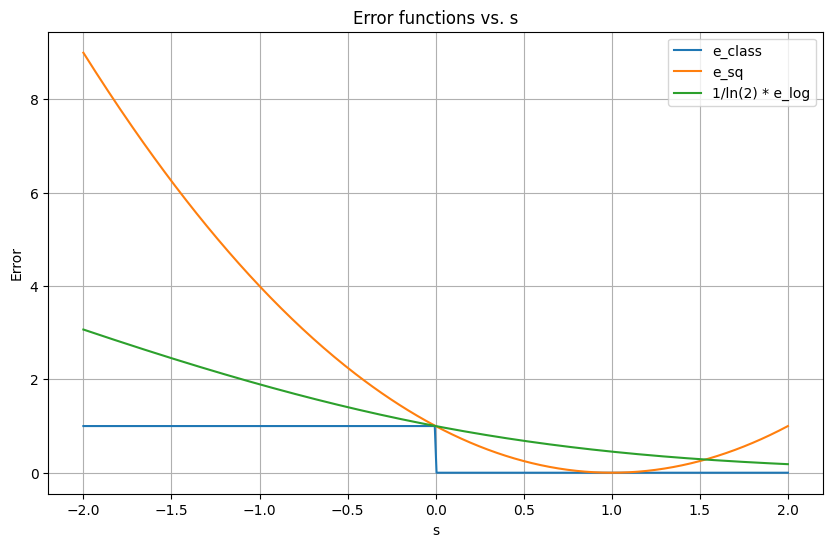

In [2]:
#(a)

import numpy as np
import matplotlib.pyplot as plt

s = np.linspace(-2, 2, 400)
e_class = [1 if val < 0 else 0 for val in s]
e_sq = (1 - s)**2
e_log = np.log(1 + np.exp(-s)) / np.log(2)  # Divided by ln(2)

plt.figure(figsize=(10, 6))
plt.plot(s, e_class, label="e_class")
plt.plot(s, e_sq, label="e_sq")
plt.plot(s, e_log, label="1/ln(2) * e_log")
plt.legend()
plt.xlabel('s')
plt.ylabel('Error')
plt.title('Error functions vs. s')
plt.grid(True)
plt.show()


### (b) Show that $e_{class}(s,y) \leq e_{sq}(s,y)$, and hence the classification error is bounded by the square error
Since $ e_{class}(s,y) $ is either 0 or 1 and $ e_{sq}(s,y) $ is $ (y-s)^2 $, the inequality will hold if $ (y-s)^2 $ is greater than or equal to 1 whenever $ e_{class}(s,y) $ is 1.

For $ y = +1 $, $ e_{class}(s,y) $ is 1 for $ s < 0 $.
If $ s < 0 $, $ (1-s)^2 \geq 1 $.

For $ y = -1 $, $ e_{class}(s,y) $ is 1 for $ s > 0 $.
If $ s > 0 $, $ (-1-s)^2 \geq 1 $.

### (c) Show that $e_{class}(s,y) \leq \frac{1}{\ln 2}e_{log}(s,y)$, and, as in part (b), get an upper bound (up to a constant factor) using the logistic regression error.

Using the inequality $ 1 + x \leq e^x $ for all real numbers $ x $, we have:
$$ e_{log}(s,y) = \ln(1 + \text{exp}^{-ys}) \leq \ln(\text{exp}^{-ys}) = -ys $$

Now, when $ y = +1 $ and $ s < 0 $, we have:
$$ -ys > 0 $$
And when $ y = +1 $ and $ s \geq 0 $, $ e_{class}(s,y) $ is 0.

This suggests that $ e_{log}(s,y) $ is always non-negative and can be greater than 1. Multiplying by the constant $ \frac{1}{\ln 2} $ ensures that $ e_{class}(s,y) \leq \frac{1}{\ln 2}e_{log}(s,y) $.

Therefore, the logistic regression error provides an upper bound to the classification error up to a constant factor of $ \frac{1}{\ln 2} $.

# PRML

PRML 2.[43];3.[1];4.[1,7,12,13,14,17,18]

## Exercise 2.43

The following distribution

(2.293) $$p(x|\sigma^2,q) = \frac{q}{2(2\sigma^2)^{1/q}\Gamma(1/q)}\exp\left(-\left|\frac{x}{\sigma}\right|^q\right)$$

is a generalization of the univariate Gaussian distribution. Show that this distribution is normalized so that

(2.294) $$\int_{-\infty}^{\infty}p(x|\sigma^2,q)dx = 1$$

and that it reduces to the Gaussian when q = 2. Consider a regression model in which the target variable is given by $t = y(x,\mathbf{w}) + \epsilon$ and $\epsilon$ is a random noise variable drawn from the distribution (2.293). Show that the log likelihood function over $w$ and $\epsilon^2$, for an observed data set of input vectors $\mathbf{X} = \{x_1, ..., x_N\}$ and corresponding target variables $\mathbf{t} = (t_1,...,t_N)^T$, is given by

(2.295) $$\ln p(\mathbf{t}|\mathbf{X},\mathbf{w},\epsilon^2,q) = -\frac{1}{2\epsilon^2}\sum_{n=1}^{N}|y(x_n,\mathbf{w})-t_n|^q - \frac{N}{q}ln(2\epsilon^2)+const$$

where "$const$" denotes terms independent of both $\mathbf{w}$, this is the $L_q$ error function considered considered in Section 1.5.5.

### Solution:
#### Normalization

(2.293) 
$$ p(x|\sigma^2,q) = \frac{q}{2(2\sigma^2)^{1/q}\Gamma(1/q)}\exp\left(-\left|\frac{x}{\sigma}\right|^q\right) $$

To prove:

$$ \int_{-\infty}^{\infty}p(x|\sigma^2,q)dx = 1 $$

$$ \int_{-\infty}^{\infty}p(x|\sigma^2,q)dx = 2 \int_{0}^{\infty}p(x|\sigma^2,q)dx $$

Let $u = \left(\frac{x}{\sigma}\right)^q \implies dx = \sigma^{1/q} u^{(1/q)-1} du$

$$ 2 \int_{0}^{\infty} \frac{q}{2(2\sigma^2)^{1/q}\Gamma(1/q)} u^{(1/q)-1} e^{-u} \sigma^{1/q} du $$


$$ 2 \frac{q}{2(2\sigma^2)^{1/q}\Gamma(1/q)} \sigma^{1/q} \Gamma(1/q) = 1 $$

#### Reduction to Gaussian

To prove that our distribution becomes Gaussian for $q = 2$:

Given $q = 2$, the function becomes:

$$ p(x|\sigma^2,2) = \frac{2}{2(2\sigma^2)^{1/2}\Gamma(1/2)}\exp\left(-\left|\frac{x}{\sigma}\right|^2\right) $$

Since $\Gamma(1/2) = \sqrt{\pi}$:

$$ p(x|\sigma^2,2) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(-\frac{x^2}{2\sigma^2}\right) $$


#### Log Likelihood

For a given dataset $\mathbf{X}$ and $\mathbf{t}$, we wish to find the log likelihood.

Given:

$$ t_n = y(x_n,\mathbf{w}) + \epsilon $$

and $\epsilon$ is drawn from the distribution (2.293), the likelihood for a single data point is:

$$ p(t_n|x_n,\mathbf{w},\epsilon^2,q) = \frac{q}{2(2\epsilon^2)^{1/q}\Gamma(1/q)}\exp\left(-\left|\frac{y(x_n,\mathbf{w})-t_n}{\epsilon}\right|^q\right) $$

$$ \ln p(\mathbf{t}|\mathbf{X},\mathbf{w},\epsilon^2,q) = \sum_{n=1}^{N} \left( \ln \left( \frac{q}{2(2\epsilon^2)^{1/q}\Gamma(1/q)} \right) - \left|\frac{y(x_n,\mathbf{w})-t_n}{\epsilon}\right|^q \right) $$

$$ \ln p(\mathbf{t}|\mathbf{X},\mathbf{w},\epsilon^2,q) = -\frac{1}{2\epsilon^2}\sum_{n=1}^{N}|y(x_n,\mathbf{w})-t_n|^q - \frac{N}{q}ln(2\epsilon^2)+\text{const} $$


## Exercise 3.1

Show that the '$tanh$' function and the logistic sigmoid function (3.6) are related by

(3.100) $$\tanh(a) = 2\sigma(2a) - 1$$

Hence show that a general linear combination of logistic sigmoid functions of hte form

(3.101) $$y(x,\mathbf{w}) = w_0 + \sum_{j=1}^{M}w_j\sigma\left(\frac{x-\mu_j}{s}\right)$$

is equivalent to a linear combination of '$tanh$' functions of the form 

(3.102) $$y(x,\mathbf{w}) = \mu_0 + \sum_{j=1}^{M}\mu_j\tanh\left(\frac{x-\mu_j}{s}\right)$$

and find expressions to relate the new parameters $\{\mu_1,...,\mu_M\}$ to the original parameters $\{w_1,...,w_M\}$.

### Solution::

**1. Relation between $\tanh(a)$ and $\sigma(2a)$**

(3.6) 
$$ \sigma(a) = \frac{1}{1+e^{-a}} $$

$$ \sigma(2a) = \frac{1}{1+e^{-2a}} $$

$$ \tanh(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}} $$

$$ e^a = \frac{1 + e^{-2a}}{e^{-2a}} $$
$$ e^{-a} = e^{-2a} e^a = \frac{e^{-2a} + 1}{e^{-2a}} $$


$$ \tanh(a) = \frac{\frac{1 + e^{-2a}}{e^{-2a}} - \frac{e^{-2a} + 1}{e^{-2a}}}{\frac{1 + e^{-2a}}{e^{-2a}} + \frac{e^{-2a} + 1}{e^{-2a}}} $$


$$ \tanh(a) = \frac{2}{2 + 2e^{-2a}} - 1 $$


$$ \tanh(a) = 2\sigma(2a) - 1 $$

**2. Relation between Linear Combinations of $\sigma(a)$ and $\tanh(a)$**

$$ y(x,\mathbf{w}) = w_0 + \sum_{j=1}^{M}w_j\sigma\left(\frac{x-\mu_j}{s}\right) $$


$$ y(x,\mathbf{w}) = w_0 + \sum_{j=1}^{M}w_j\left(2\sigma\left(\frac{2(x-\mu_j)}{s}\right) - 1\right) $$


$$ \mu_0 = w_0 - \sum_{j=1}^{M}w_j $$


$$ \mu_j = 2w_j $$

**3. Relation between Parameters**


$$ \mu_0 = w_0 - \sum_{j=1}^{M}w_j $$
$$ \mu_j = 2w_j $$
for $j = 1,...,M$.

## Exercise 4.1

Givin a set of data points $\{ x_n\}$, we can define the convex hull to be a set of all points given by

(4.156) $$x=\sum_{n}a_nx_n$$

where $a_n \geq 0$ and $\sum_{n}a_n=1$. Consider a second set of points $\{y_n\}$ together with the corresponding convex hull. By definition, the two sets of points will be linearly seperable if there exists a vector $\mathbf{w}$ and a scalar $w_0$ such that $\mathbf{w}^Tx_n + w_0 > 0$ for all $x_n$ and $\mathbf{w}^Ty_n + w_0 < 0$ for all $y_n$. Show that if their convex hulls intersectm the two sets of points cannot be linearly separable, and conversely that if they are linearly separable, their convex hulls do not intersect.

### Solution:

1. If the convex hulls of two sets of points intersect, the two sets of points cannot be linearly separable:

Suppose the convex hulls of two sets of points $\{x_n\}$ and $\{y_n\}$ intersect, which means there exist convex combination coefficients $a_n \geq 0$ and $b_n \geq 0$ such that:

$$\sum_{n} a_n = 1, \quad \sum_{n} b_n = 1,$$
$$\sum_{n} a_n x_n = \sum_{n} b_n y_n.$$

Now, let's assume that the two sets of points are linearly separable. This implies there exists a vector $\mathbf{w}$ and a scalar $w_0$ such that:

$$\mathbf{w}^Tx_n + w_0 > 0 \quad \text{for all } x_n$$
$$\mathbf{w}^Ty_n + w_0 < 0 \quad \text{for all } y_n.$$



$$
\begin{align*}
\sum_{n} a_n(\mathbf{w}^Tx_n + w_0) &> 0 \\
\sum_{n} b_n(\mathbf{w}^Ty_n + w_0) &< 0.
\end{align*}
$$


$$
\sum_{n} a_n(\mathbf{w}^Tx_n + w_0) + \sum_{n} b_n(\mathbf{w}^Ty_n + w_0) > 0.
$$

$$
\sum_{n} (a_n \mathbf{w}^Tx_n + b_n \mathbf{w}^Ty_n + (a_n + b_n)w_0) > 0.
$$

Since $\sum_{n} a_n = 1$ and $\sum_{n} b_n = 1$, we have $\sum_{n} (a_n + b_n) = 2$, so the expression becomes:

$$
\sum_{n} (a_n \mathbf{w}^Tx_n + b_n \mathbf{w}^Ty_n + 2w_0) > 0.
$$

This leads to a contradiction because the left-hand side is greater than zero, while the right-hand side is not. Therefore, if the convex hulls of the two sets of points intersect, the two sets of points cannot be linearly separable.

2. If two sets of points are linearly separable, their convex hulls do not intersect:

Suppose the two sets of points $\{x_n\}$ and $\{y_n\}$ are linearly separable. This implies there exists a vector $\mathbf{w}$ and a scalar $w_0$ such that:

$$
\mathbf{w}^Tx_n + w_0 > 0 \quad \text{for all } x_n
$$

and

$$
\mathbf{w}^Ty_n + w_0 < 0 \quad \text{for all } y_n.
$$

Now, let's assume, for the sake of contradiction, that their convex hulls intersect at a point $z$:

$$
z = \sum_n a_n x_n = \sum_n b_n y_n
$$

where $a_n \geq 0$, $\sum_n a_n = 1$, $b_n \geq 0$, and $\sum_n b_n = 1$.

Now, consider $\mathbf{w}^Tz + w_0$:

$$
\begin{align*}
\mathbf{w}^Tz + w_0 &= \mathbf{w}^T\left(\sum_n a_n x_n\right) + w_0 \\
&= \sum_n a_n(\mathbf{w}^Tx_n + w_0).
\end{align*}
$$

Since $\mathbf{w}^Tx_n + w_0 > 0$ for all $x_n$, each term in the summation is positive. Therefore:

$$
\mathbf{w}^Tz + w_0 > 0.
$$

However, this contradicts the fact that $z$ lies in the convex hull of $\{y_n\}$, and therefore:

$$
\mathbf{w}^Ty_n + w_0 < 0 \quad \text{for all } y_n.
$$

Hence, $\mathbf{w}^Tz + w_0 < 0$. This contradiction arises from the assumption that the convex hulls intersect, so if two sets of points are linearly separable, their convex hulls do not intersect.

## Exercise 4.7

Show that the logistic sigmoid function (4.59) satisfies the property $\sigma(-a) = 1 - \sigma(a)$ and its inverse is given by $\sigma^{-1}(y) = \ln(y/(1-y))$.

### Solution:

Alright, let's take this step by step. 

1. Proving that $\sigma(-a) = 1 - \sigma(a)$
$$ \sigma(a) = \frac{1}{1 + e^{-a}} $$
$$ \sigma(-a) = \frac{1}{1 + e^{-(-a)}} $$
$$ \sigma(-a) = \frac{1}{1 + e^{a}} $$
$$ 1 - \sigma(a) = 1 - \frac{1}{1 + e^{-a}} $$
$$ = \frac{1 + e^{-a} - 1}{1 + e^{-a}} $$
$$ = \frac{e^{-a}}{1 + e^{-a}} $$
$$ = \frac{1}{e^a + 1} $$
$$ \sigma(-a) = 1 - \sigma(a) $$

2. Finding the inverse of the logistic sigmoid function

$$ y = \frac{1}{1 + e^{-a}} $$
$$ y(1 + e^{-a}) = 1 $$
$$ y + ye^{-a} = 1 $$
$$ ye^{-a} = 1 - y $$
$$ e^{-a} = \frac{1 - y}{y} $$
$$ \ln(e^{-a}) = \ln\left(\frac{1 - y}{y}\right) $$
$$ -a = \ln\left(\frac{1 - y}{y}\right) $$
$$ a = \ln\left(\frac{y}{1 - y}\right) $$
$$ \sigma^{-1}(y) = \ln\left(\frac{y}{1 - y}\right) $$

## Exercise 4.12

Verify the relation (4.88) for the derivative of the logistic sigmoid function defined by (4.59)

(4.59) $$\sigma(a) = \frac{1}{1+e^{-a}}$$

(4.88) $$\frac{\partial \sigma}{\partial a} = \sigma(1-\sigma)$$

### Solution:

$$ \sigma(a) = \frac{1}{1 + e^{-a}} $$
$$ \sigma(a) = (1 + e^{-a})^{-1} $$


Using the chain rule, if $ f(u) = u^{-1} $ and $ u(v) = 1 + e^{-v} $, then $ \sigma(a) = f(u(a)) $ and:
$$ \frac{df}{du} = -u^{-2} $$
$$ \frac{du}{da} = e^{-a} $$

$$ \frac{\partial \sigma}{\partial a} = \frac{df}{du} \cdot \frac{du}{da} $$
$$ \frac{\partial \sigma}{\partial a} = - (1 + e^{-a})^{-2} \cdot e^{-a} $$

$$ \frac{\partial \sigma}{\partial a} = - \sigma(a)^2 \cdot e^{-a} $$

$$ e^{-a} = \frac{1}{\sigma(a)} - 1 $$

$$ \frac{\partial \sigma}{\partial a} = -\sigma(a)^2 \left( \frac{1}{\sigma(a)} - 1 \right) $$
$$ \frac{\partial \sigma}{\partial a} = -\sigma(a) + \sigma(a)^2 $$
$$ \frac{\partial \sigma}{\partial a} = \sigma(a)(1 - \sigma(a)) $$

## Exercise 4.13

By making use of the result (4.88) for the derivative of the logistic sigmoid, show that the derivative of the error function (4.90) for the logistic regression model is given by (4.91)

(4.88) $$\frac{\partial \sigma}{\partial a} = \sigma(1-\sigma)$$

(4.90) $$E(\mathbf{w}) = -ln p(\bf{t}|w) =- \sum_{n=1}^{N}\{t_nlny_n + (1-t_n)ln(1-y_n)\}$$


(4.91) $$\nabla E(\mathbf{w}) = \sum_{n=1}^{N}(y_n-t_n) {\varnothing}_n$$

### Solution:

Given the error function (4.90):

$$ E(\mathbf{w}) = - \sum_{n=1}^{N} \{ t_n \ln(y_n) + (1-t_n) \ln(1-y_n) \} $$

$$ \frac{\partial E}{\partial w_j} = - \sum_{n=1}^{N} \{ t_n \frac{1}{y_n} - (1-t_n) \frac{1}{1-y_n} \} \frac{\partial y_n}{\partial w_j} $$

$$ \frac{\partial y_n}{\partial w_j} = \frac{\partial \sigma(a_n)}{\partial a_n} \frac{\partial a_n}{\partial w_j} $$

$$ \frac{\partial E}{\partial w_j} = - \sum_{n=1}^{N} \{ t_n \frac{1}{y_n} - (1-t_n) \frac{1}{1-y_n} \} y_n(1-y_n) \varnothing_{nj} $$
$$ = \sum_{n=1}^{N} \{ t_n(1-y_n) - (1-t_n)y_n \} \varnothing_{nj} $$
$$ = \sum_{n=1}^{N} (y_n-t_n) \varnothing_{nj} $$

$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N} (y_n-t_n) \varnothing_n $$

## Exercise 4.14

Show that a linearly separable data set, the maximum likelihood Solution: for the logistic regression model is obtained by finding a vector $w$ whose decision boudnary $w^Tx=0$ separates the classes and then taking the magnitude of $w$ to infinity.

### Solution:

Sure, let's break this down mathematically.

Given the logistic regression model:
$$ y(\mathbf{x}) = \sigma(\mathbf{w}^T\mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}} $$

$$ L(\mathbf{w}) = \sum_{n=1}^{N} \{ t_n \ln y_n + (1-t_n) \ln(1-y_n) \} $$

To maximize the log likelihood, we differentiate with respect to $ \mathbf{w} $:
$$ \frac{\partial L}{\partial \mathbf{w}} = \sum_{n=1}^{N} \{ t_n \frac{1}{y_n} - (1-t_n) \frac{1}{1-y_n} \} \frac{\partial y_n}{\partial \mathbf{w}} $$

$$ \frac{\partial y_n}{\partial \mathbf{w}} = y_n(1-y_n) \mathbf{x}_n $$

$$ \frac{\partial L}{\partial \mathbf{w}} = \sum_{n=1}^{N} \{ t_n \frac{1}{y_n} - (1-t_n) \frac{1}{1-y_n} \} y_n(1-y_n) \mathbf{x}_n $$

Now, consider the two cases:

1) For $ t_n = 1 $: Maximizing the log likelihood means pushing $ y_n $ towards 1. That can be achieved by pushing $ \mathbf{w}^T \mathbf{x}_n $ towards positive infinity.

2) For $ t_n = 0 $: Maximizing the log likelihood means pushing $ y_n $ towards 0. That can be achieved by pushing $ \mathbf{w}^T \mathbf{x}_n $ towards negative infinity.

For a linearly separable dataset, there exists a weight vector $ \mathbf{w} $ that perfectly separates the data, such that all patterns from class $ C_1 $ satisfy $ \mathbf{w}^T\mathbf{x}_n > 0 $ and all patterns from class $ C_2 $ satisfy $ \mathbf{w}^T\mathbf{x}_n < 0 $.

To maximize $ L(\mathbf{w}) $, we should push the decision boundaries to ∞ and -∞, respectively. This can be achieved by:

- For all $ \mathbf{x}_n $ in class $ C_1 $, increase $ \mathbf{w}^T\mathbf{x}_n $ towards +∞.
- For all $ \mathbf{x}_n $ in class $ C_2 $, decrease $ \mathbf{w}^T\mathbf{x}_n $ towards -∞.

Given that the logistic function $ y(\mathbf{x}) $ is bounded between 0 and 1, pushing $ \mathbf{w}^T\mathbf{x}_n $ to +∞ (or -∞) makes $ y(\mathbf{x}_n) $ converge to 1 (or 0).

Therefore, for a linearly separable dataset, the maximum likelihood solution for the logistic regression model is  obtained by finding a vector $ \mathbf{w} $ that  separates the classes and then taking the magnitude of $ \mathbf{w} $ to infinity.

## Exercise 4.17

Show that the derivatives of the softmax activation function (4.104), where the $a_k$ are defined by (4.105), are given by (4.106)

(4.104) $$p(\mathbf{C}_k|\varnothing) = y_k = \frac{\exp(a_k)}{\sum_j \exp(a_j)}$$

(4.105) $$a_k=w_k^T\varnothing$$

(4.106) $$\frac{\partial y_k}{\partial a_j} = y_k(I_{kj}-y_j)$$

### Solution:

$$ y_k = \frac{\exp(a_k)}{\sum_j \exp(a_j)} $$

The derivative can be split into two cases: 
   
   1) $ j = k $
   
   2) $ j \neq k $

Case 1: $ j = k $:
$$ \frac{\partial y_k}{\partial a_k} = \frac{\exp(a_k) \sum_j \exp(a_j) - \exp(a_k) \exp(a_k)}{(\sum_j \exp(a_j))^2} $$
$$ = y_k - y_k^2 $$
$$ = y_k(1-y_k) $$

Case 2: $ j \neq k $:
$$ \frac{\partial y_k}{\partial a_j} = \frac{0 - \exp(a_k) \exp(a_j)}{(\sum_j \exp(a_j))^2} $$
$$ = -y_k y_j $$

Combining the two cases using the Kronecker delta function $I_{kj}$ (which is 1 when $j=k$ and 0 otherwise), we get:

$$ \frac{\partial y_k}{\partial a_j} = y_k (I_{kj} - y_j) $$

## Exercise 4.18

Using the result (4.91) for the derivatives of the softmax activation function, show that the gradients of the cross-entropy error function (4.108) are given by (4.109)

(4.91) $$\nabla E(\mathbf{w}) = \sum_{n=1}^{N}(y_n-t_n) {\varnothing}_n$$

(4.108) $$E(w_1,..., w_K) = -ln p(\mathbf{T}|w_1,...,w_K) = -\sum_{n=1}^{N}\sum_{k=1}^{K}t_{nk}ln y_{nk}$$

(4.109) $$\nabla _{w_j} E(w_1,...,w_K) = \sum_{n=1}^{N}(y_{nk}-t_{nk}){\varnothing}_{nj}$$

### Solution:

$$ E(w_1,..., w_K) = -\sum_{n=1}^{N}\sum_{k=1}^{K}t_{nk}\ln y_{nk} $$

$$ \frac{\partial E}{\partial w_j} = -\sum_{n=1}^{N}\sum_{k=1}^{K} t_{nk} \frac{1}{y_{nk}} \frac{\partial y_{nk}}{\partial w_j} $$

$$ \frac{\partial y_{nk}}{\partial w_j} = y_{nk}(I_{kj} - y_{nj}) \frac{\partial a_{nk}}{\partial w_j} $$

$$ \frac{\partial a_{nk}}{\partial w_j} = \varnothing_{nj} $$

$$ \frac{\partial y_{nk}}{\partial w_j} = y_{nk}(I_{kj} - y_{nj}) \varnothing_{nj} $$

$$ \frac{\partial E}{\partial w_j} = -\sum_{n=1}^{N}\sum_{k=1}^{K} t_{nk} \frac{1}{y_{nk}} y_{nk}(I_{kj} - y_{nj}) \varnothing_{nj} $$

$$ \frac{\partial E}{\partial w_j} = -\sum_{n=1}^{N}\sum_{k=1}^{K} t_{nk}(I_{kj} - y_{nj}) \varnothing_{nj} $$

$$ \frac{\partial E}{\partial w_j} = -\sum_{n=1}^{N} t_{nj} \varnothing_{nj} + \sum_{n=1}^{N}\sum_{k=1}^{K} t_{nk}y_{nj} \varnothing_{nj} $$

$$ \frac{\partial E}{\partial w_j} = \sum_{n=1}^{N} (y_{nj} - t_{nj}) \varnothing_{nj} $$